In [18]:
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Removing null from dataset

In [2]:
dataset = sns.load_dataset('titanic')

null_columns=dataset.columns[dataset.isnull().any()]
#print(dataset[dataset.isnull().any(axis=1)][null_columns].head())

null_row_index = dataset[dataset.isnull().any(axis=1)][null_columns].index

dataset = dataset.drop(index=null_row_index)
print(dataset[dataset.isnull().any(axis=1)][null_columns])
print(dataset.columns[dataset.isnull().any()])


Empty DataFrame
Columns: [age, embarked, deck, embark_town]
Index: []
Index([], dtype='object')


## Visualizing data

In [4]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


## Getting metrics from dataset

In [10]:
survided_num = (dataset['survived'] == 1).sum()
women_num = (dataset['sex'] == "female").sum()
men_num = (dataset['sex'] == "male").sum()

print("number of survivals: ", survided_num)
print("average number of passengers: ", int(dataset['age'].mean()))
print("number of women:", women_num)
print("number of men:", men_num)

number of survivals:  123
average number of passengers:  35
number of women: 88
number of men: 94


## Checking men and women distribuitions

<Axes: xlabel='sex', ylabel='Count'>

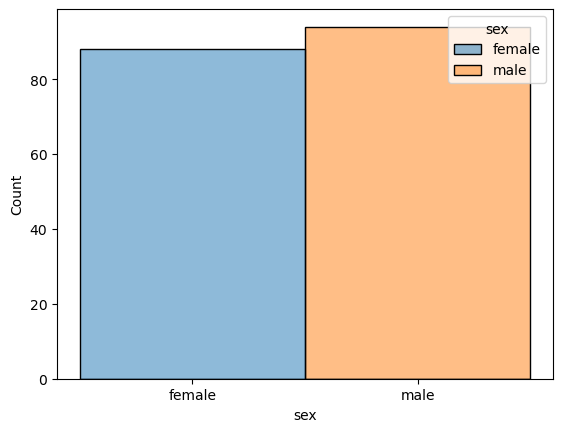

In [60]:
# dataset['sex'].hist(bins=2) # Creates a histogram for the 'Value' column with 5 bins
# sns.barplot(x='sex', y=dataset['sex'] == "male", data=dataset, palette='viridis')
# sns.barplot(x='sex', data=dataset, palette='viridis')

sns.histplot(x='sex', kde=True, data=dataset, hue='sex')

## Checking fare distribution regarding class

/tmp/ipykernel_9631/2659068098.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='fare', data=dataset, width=0.3, palette='magma')


<Axes: xlabel='class', ylabel='fare'>

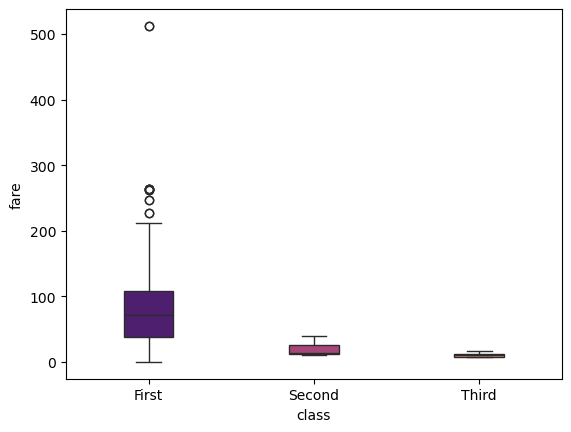

In [62]:
# unique_classes = dataset["pclass"].unique()
# print(unique_classes)

# fig, axes = plt.subplots(1, len(unique_classes))

# for elem in unique_classes:
#     class_dataset = dataset[dataset['pclass'] == elem]
#     axes[elem - 1] = class_dataset['fare'].plot(kind='box')
#     axes[elem - 1].set_title(f"Distribuition of fare in class {elem}")

# fig.show()


sns.boxplot(x='class', y='fare', data=dataset, width=0.3, palette='magma')

<Axes: xlabel='sex', ylabel='class'>

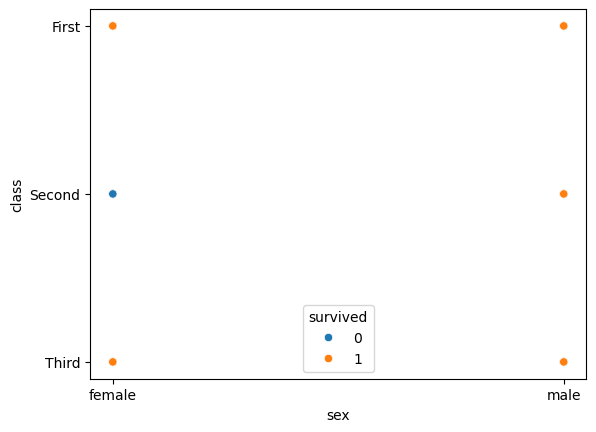

In [44]:
# sns.scatterplot(x='sex', y='pclass', data=dataset[dataset['survived'] == 1], hue='age')
# sns.scatterplot(x='sex', y='pclass', data=dataset, hue='survived')
sns.scatterplot(x='sex', y='class', data=dataset, hue='survived')

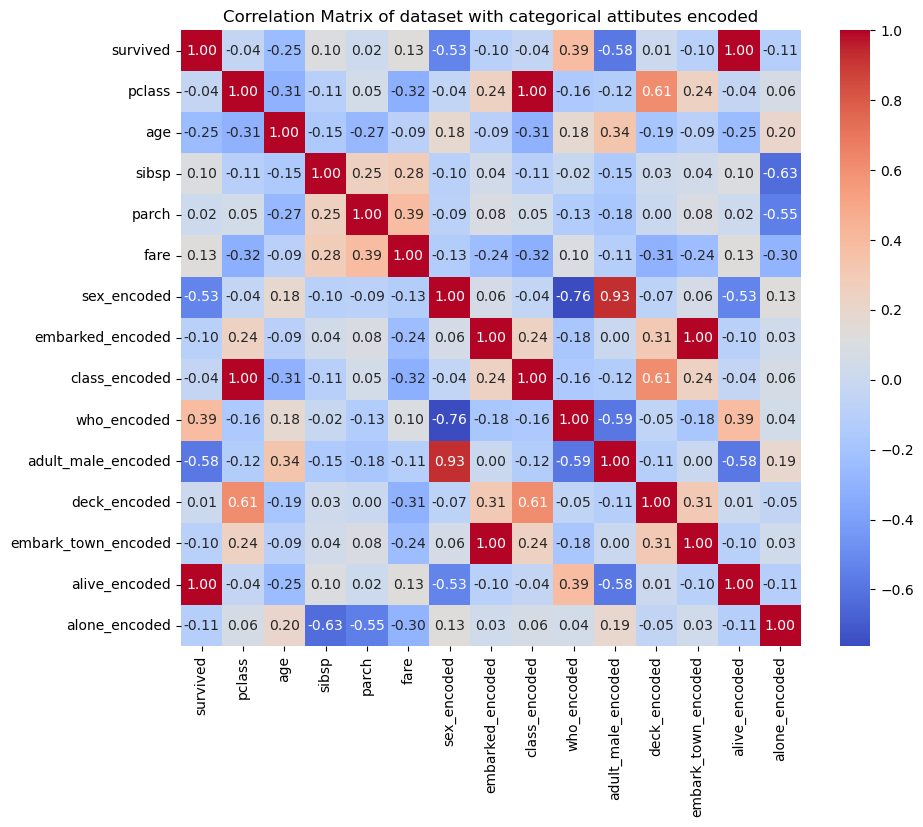

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['sex_encoded'] = le.fit_transform(dataset['sex'])
dataset['embarked_encoded'] = le.fit_transform(dataset['embarked'])
dataset['class_encoded'] = le.fit_transform(dataset['class'])
dataset['who_encoded'] = le.fit_transform(dataset['who'])
dataset['adult_male_encoded'] = le.fit_transform(dataset['adult_male'])
dataset['deck_encoded'] = le.fit_transform(dataset['deck'])
dataset['embark_town_encoded'] = le.fit_transform(dataset['embark_town'])
dataset['alive_encoded'] = le.fit_transform(dataset['alive'])
dataset['alone_encoded'] = le.fit_transform(dataset['alone'])

dataset_test = dataset.drop(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alive', 'alone'], axis=1)

correlation_matrix = dataset_test.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of dataset with categorical attibutes encoded')
plt.show()

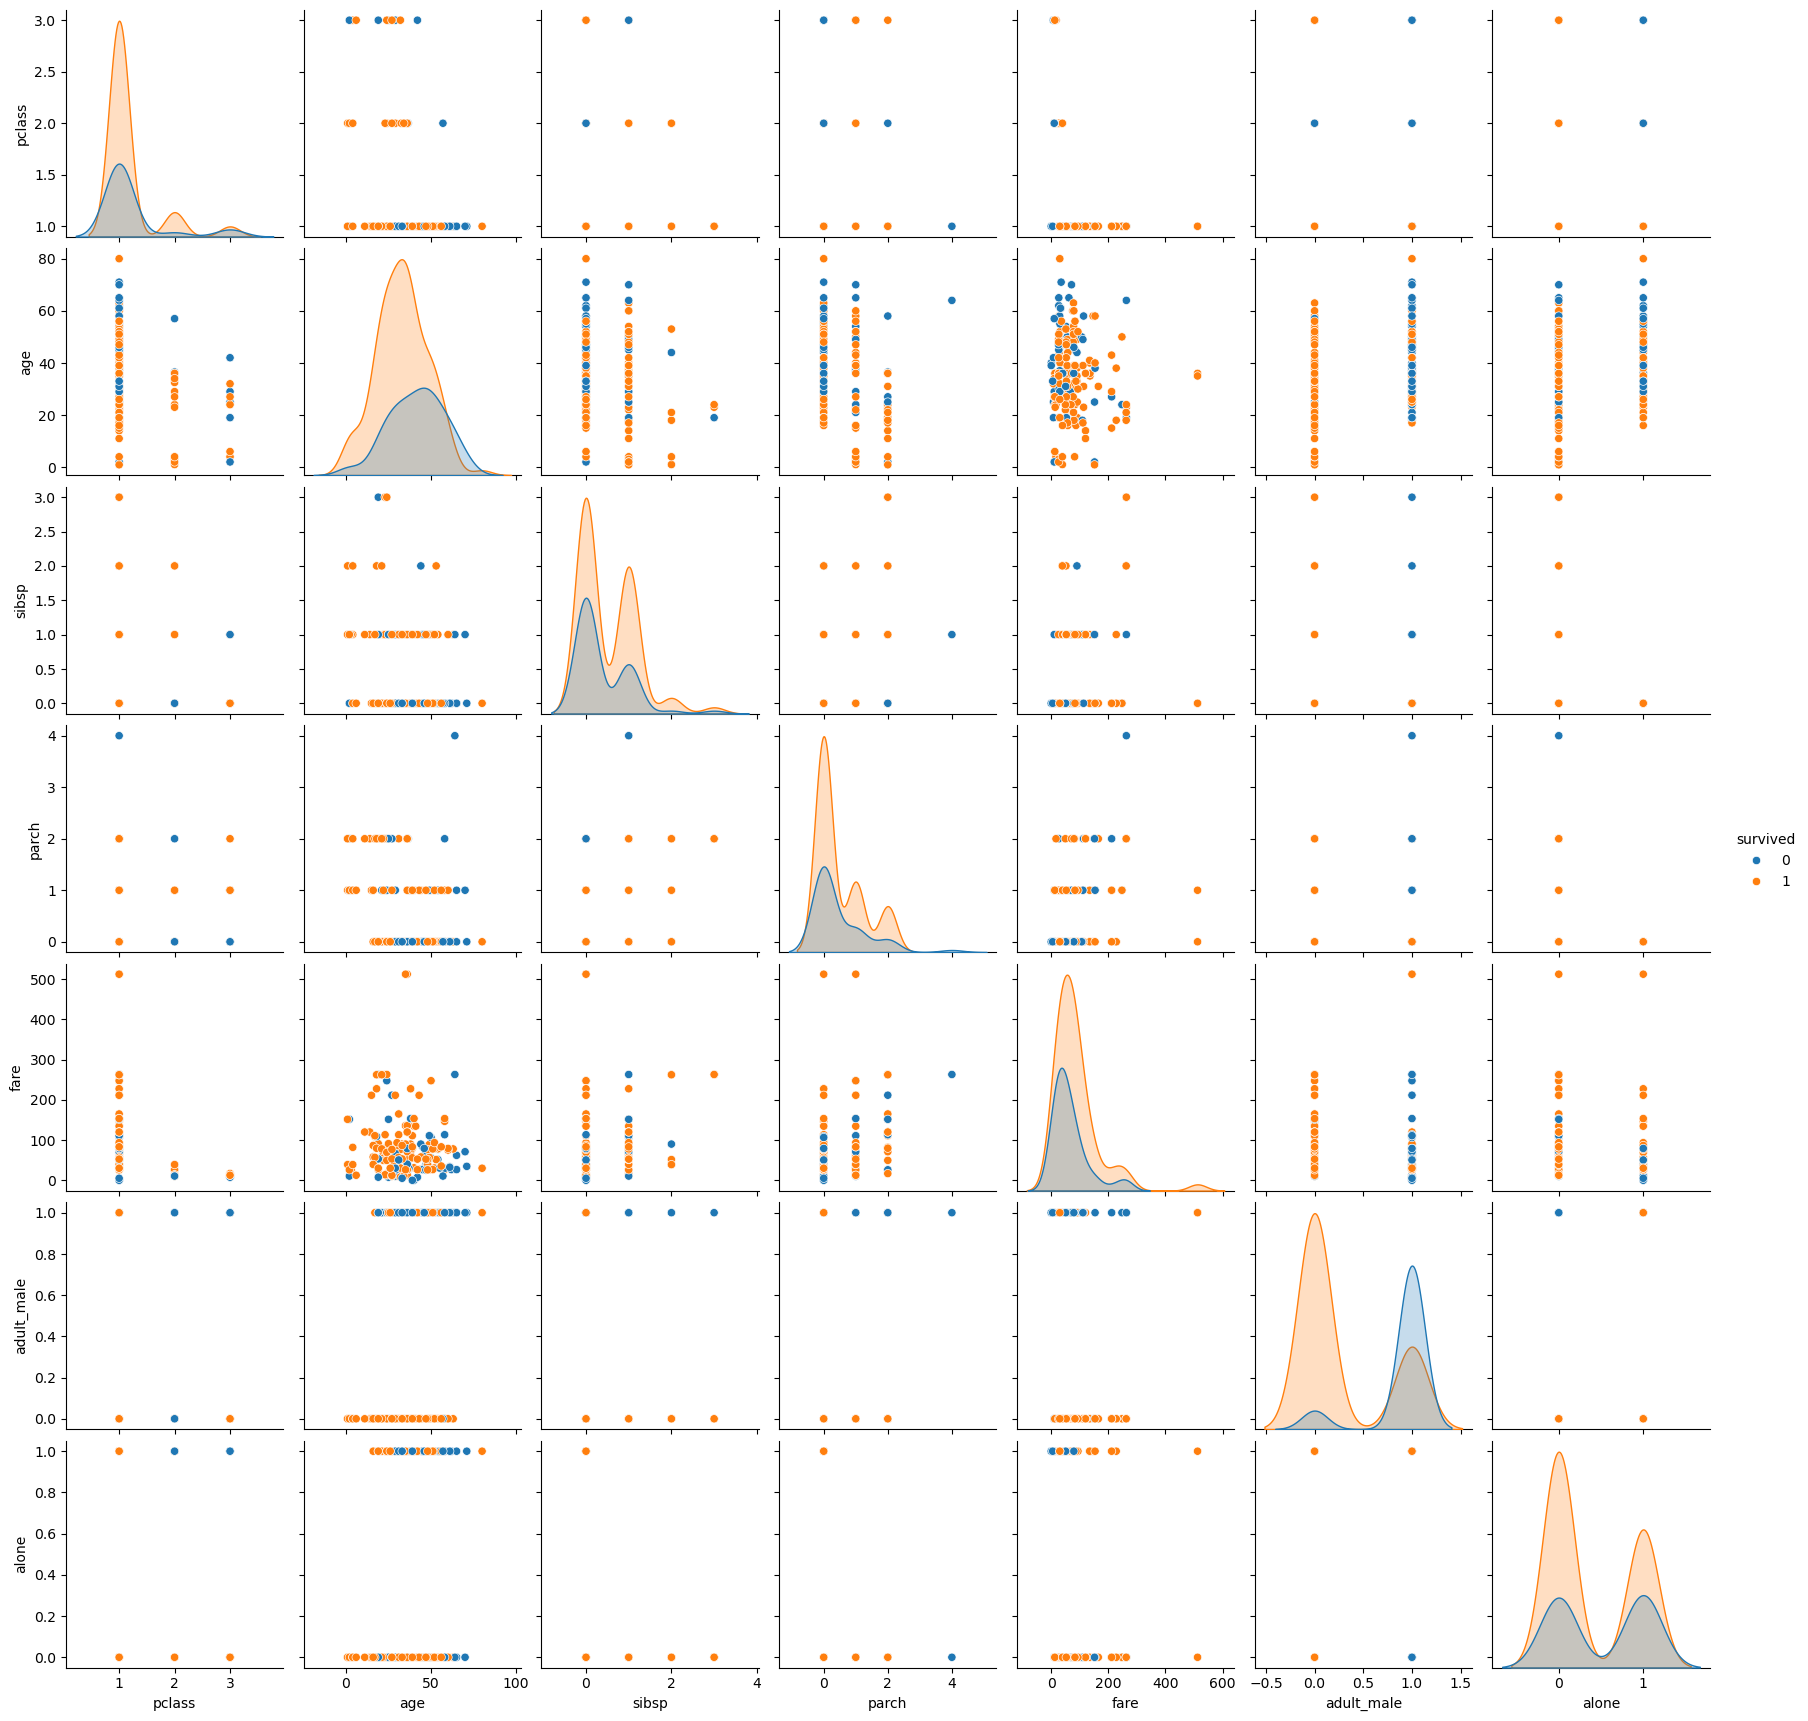

In [40]:
sns.pairplot(data=dataset, hue='survived')